#### Setup

In [23]:
# Imports
import numpy as np
import scipy.optimize as opt  # import root-finding algorithm
import sympy as sp  # Python toolbox for symbolic maths
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Toolbox for rendring 3D figures
from mpl_toolkits import mplot3d  # Toolbox for rendring 3D figures

In [24]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display
from ipywidgets import interact
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")
my_layout = widgets.Layout()

fig_w, fig_h = 12, 4.5
my_fontsize = 16
my_params = {'axes.labelsize': my_fontsize,
          'axes.titlesize': my_fontsize,
          'figure.figsize': [fig_w, fig_h],
          'font.size': my_fontsize,
          'legend.fontsize': my_fontsize-4,
          'lines.markersize': 8.,
          'lines.linewidth': 2.,
          'xtick.labelsize': my_fontsize-2,
          'ytick.labelsize': my_fontsize-2}

plt.rcParams.update(my_params)

# @title Plotting Functions
def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend.process_series()
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)


def plot_functions(function, show_derivative, show_integral):

  # For sympy we first define our symbolic variable
  x, y, z, t, f = sp.symbols('x y z t f')

  # We define our function
  if function == 'Linear':
    f = -2*t
    name = r'$-2t$'
  elif function == 'Parabolic':
    f =  t**2
    name = r'$t^2$'
  elif function == 'Exponential':
    f =  sp.exp(t)
    name = r'$e^t$'
  elif function == 'Sine':
    f =  sp.sin(t)
    name = r'$sin(t)$'
  elif function == 'Sigmoid':
    f = 1/(1 + sp.exp(-(t-5)))
    name = r'$\frac{1}{1+e^{-(t-5)}}$'

  if show_derivative and not show_integral:
    # Calculate the derivative of sin(t) as a function of t
    diff_f = sp.diff(f)
    print('Derivative of', f, 'is ', diff_f)

    p1 = sp.plot(f, diff_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='b'
    p1[0].label='Function'
    p1[1].label='Derivative'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()
  elif show_integral and not show_derivative:

    int_f = sp.integrate(f)
    int_f = int_f - int_f.subs(t, -10)
    print('Integral of', f, 'is ', int_f)


    p1 = sp.plot(f, int_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='g'
    p1[0].label='Function'
    p1[1].label='Integral'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()


  elif show_integral and show_derivative:

    diff_f = sp.diff(f)
    print('Derivative of', f, 'is ', diff_f)

    int_f = sp.integrate(f)
    int_f = int_f - int_f.subs(t, -10)
    print('Integral of', f, 'is ', int_f)

    p1 = sp.plot(f, diff_f, int_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='b'
    p1[2].line_color='g'
    p1[0].label='Function'
    p1[1].label='Derivative'
    p1[2].label='Integral'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()

  else:

    p1 = sp.plot(f, show=False)
    p1[0].line_color='r'
    p1[0].label='Function'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()


def plot_alpha_func(t, f, df_dt):

  plt.figure()
  plt.subplot(2,1,1)
  plt.plot(t, f, 'r', label='Alpha function')
  plt.xlabel('Time (au)')
  plt.ylabel('Voltage')
  plt.title('Alpha function (f(t))')
  #plt.legend()

  plt.subplot(2,1,2)
  plt.plot(t, df_dt, 'b', label='Derivative')
  plt.title('Derivative of alpha function')
  plt.xlabel('Time (au)')
  plt.ylabel('df/dt')
  #plt.legend()


def plot_charge_transfer(t, PSP, numerical_integral):

  fig, axes = plt.subplots(1, 2)

  axes[0].plot(t, PSP)
  axes[0].set(xlabel = 't', ylabel = 'PSP')

  axes[1].plot(t, numerical_integral)
  axes[1].set(xlabel = 't', ylabel = 'Charge Transferred')

#### Coding Exercise 2.1.1: Derivative of the postsynaptic potential alpha function 

Let's use the product rule to get the derivative of the post-synaptic potential alpha function. As we saw in Video 3, the shape of the postsynaptic potential is given by the so called alpha function:

\begin{equation}
f(t) = t \cdot \text{exp}\left( -\frac{t}{\tau} \right)
\end{equation}

Here $f(t)$ is a product of $t$ and $\text{exp} \left(-\frac{t}{\tau} \right)$. So we can have $u(t) = t$ and $v(t) = \text{exp} \left( -\frac{t}{\tau} \right)$ and use the product rule! 

We have defined $u(t)$ and $v(t)$ in the code below, in terms of the variable $t$ which is an array of time steps from 0 to 10. Define $\frac{du}{dt}$ and $\frac{dv}{dt}$, the compute the full derivative of the alpha function using the product rule. You can always consult wikipedia to figure out $\frac{du}{dt}$ and $\frac{dv}{dt}$!

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


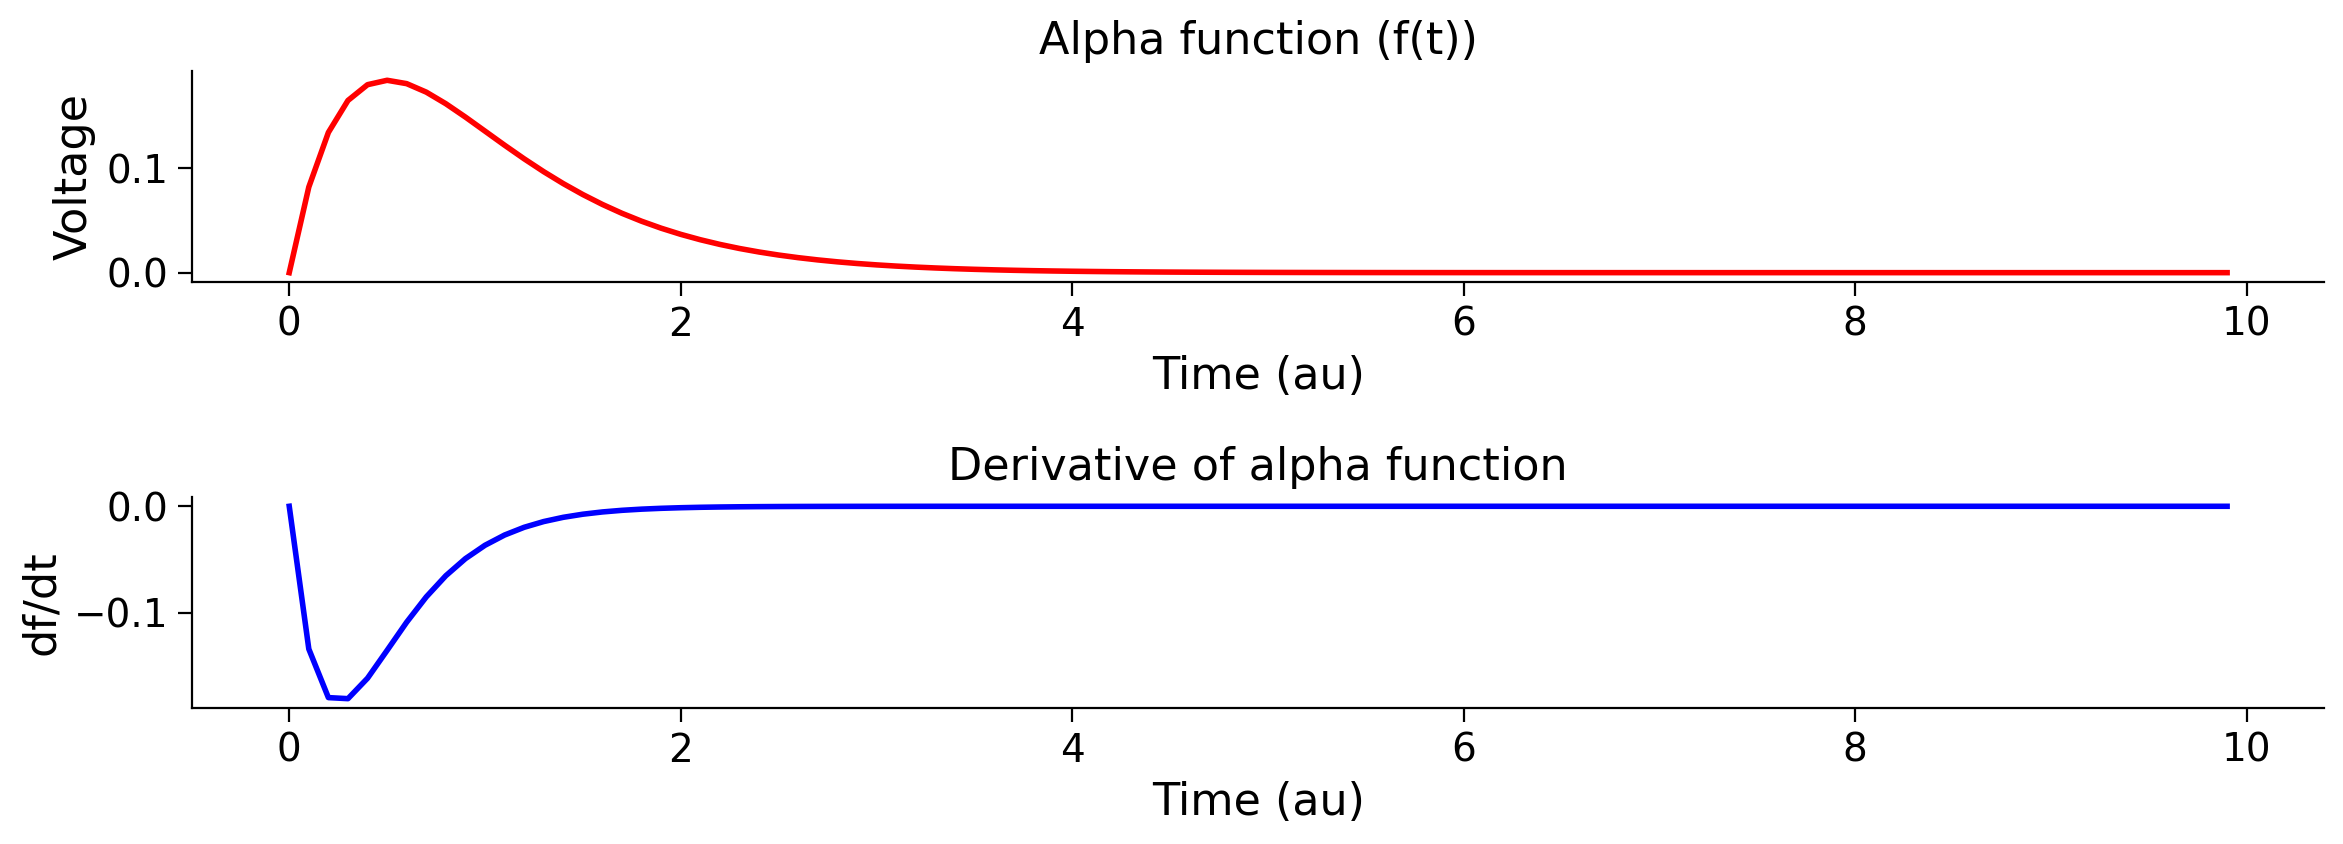

In [25]:
# Define time, time contant
t = np.arange(0,10,.1)
tau = 0.5

# Compute alpha function
f = t * np.exp(-t/tau)

# Define u(t), v(t)
u_t = t
v_t = np.exp(-t/tau)

# Define du/dt, dv/dt
du_dt = 1  
dv_dt = -1 / tau * np.exp(-t/tau)

# Define full derivative 
df_dt = u_t * dv_dt * v_t * du_dt

plot_alpha_func(t, f, df_dt)

#### Section 2.2.3: Derivatives in Python using SymPy

There is a useful Python library for getting the analytical derivatives of functions: SymPy. We actually used this in Interactive Demo 1, under the hood.

See the following cell for an example of setting up a sympy function and finding the derivative.

In [26]:
# For sympy we first define our symbolic variables
f, t = sp.symbols('f, t')

# Function definition (sigmoid)
f = 1 / (1 + sp.exp(-(t-5)))

# Get the derivative
diff_f = sp.diff(f)

# Print the resulting function
print('Derivative of ', f, 'is, ', diff_f)



Derivative of  1/(exp(5 - t) + 1) is,  exp(5 - t)/(exp(5 - t) + 1)**2


In [27]:
def compute_rate_and_gain(I, a, theta, current_timestep):
  """ Compute rate and gain of neuron based on parameters

  Args:
    I (ndarray): different possible values of the current
    a (scalar): parameter of the transfer function
    theta (scalar): parameter of the transfer function
    current_timestep (scalar): the time we're using to take steps

  Returns:
    (ndarray, ndarray): rate and gain for each possible value of I
  """

  # Compute rate
  rate = (1+np.exp(-a*(I-theta)))**-1 - (1+np.exp(a*theta))**-1

  # Compute gain using a numerical derivative
  gain = (rate[1:] - rate[0:-1])/current_timestep

  return rate, gain

In [28]:
def compute_rate_and_gain(I, a, theta, current_timestep):
  """ Compute rate and gain of neuron based on parameters

  Args:
    I (ndarray): different possible values of the current
    a (scalar): parameter of the transfer function
    theta (scalar): parameter of the transfer function
    current_timestep (scalar): the time we're using to take steps

  Returns:
    (ndarray, ndarray): rate and gain for each possible value of I
  """

  # Compute rate
  rate = (1+np.exp(-a*(I-theta)))**-1 - (1+np.exp(a*theta))**-1

  # Compute gain using a numerical derivative
  gain = (rate[1:] - rate[0:-1])/current_timestep

  return rate, gain

In [29]:
# @markdown Execute this cell to enable the widget

def plot_rate_and_gain(a, theta, I_mean):

  current_timestep = 0.1

  # Compute I
  I = np.arange(0, 8, current_timestep)

  rate, gain = compute_rate_and_gain(I, a, theta, current_timestep)
  I_1 = I_mean - current_timestep/2
  rate_1 = (1+np.exp(-a*(I_1-theta)))**-1 - (1+np.exp(a*theta))**-1
  I_2 = I_mean + current_timestep/2
  rate_2 = (1+np.exp(-a*(I_2-theta)))**-1 - (1+np.exp(a*theta))**-1

  input_range = I_2-I_1
  output_range = rate_2 - rate_1

  # Visualize rate and gain
  plt.subplot(1,2,1)
  plt.plot(I,rate)
  plt.plot([I_1,I_1],[0, rate_1],color='r')
  plt.plot([0,I_1],[rate_1, rate_1],color='b')
  plt.plot([I_2,I_2],[0, rate_2],color='r')
  plt.plot([0,I_2],[rate_2, rate_2],color='b')
  plt.xlim([0, 8])
  low, high = plt.ylim()
  plt.ylim([0, high])

  plt.xlabel('Injected current (au)')
  plt.ylabel('Output firing rate (normalized)')
  plt.title('Transfer function')

  plt.text(2, 1.3, 'Output-Input Ratio =' + str(np.round(1000*output_range/input_range)/1000), style='italic',
      bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
  plt.subplot(1,2,2)
  plt.plot(I[0:-1], gain)
  plt.plot([I_mean, I_mean],[0,0.6],color='r')
  plt.xlabel('Injected current (au)')
  plt.ylabel('Gain')
  plt.title('Gain')
  plt.xlim([0, 8])
  low, high = plt.ylim()
  plt.ylim([0, high])

_ = widgets.interact(plot_rate_and_gain, a = (0.5, 2.0, .02), theta=(1.2,4.0,0.1), I_mean= (0.5,8.0,0.1))

interactive(children=(FloatSlider(value=1.24, description='a', max=2.0, min=0.5, step=0.02), FloatSlider(value…

In [30]:
# @markdown Execute this widget to enable the demo

# Let's use sympy to calculate Partial derivatives of a function of 2-variables
@interact(f2d_string = 'x**2 + 2*x*y + y**2')
def plot_partial_derivs(f2d_string):
  f, x, y = sp.symbols('f, x, y')

  f2d = eval(f2d_string)
  f2d_dx = sp.diff(f2d,x)
  f2d_dy = sp.diff(f2d,y)

  print('Partial derivative of ', f2d, 'with respect to x is', f2d_dx)
  print('Partial derivative of ', f2d, 'with respect to y is', f2d_dy)

  p1 = sp.plotting.plot3d(f2d, (x, -5, 5), (y, -5, 5),show=True,xlabel='x', ylabel='y', zlabel='f(x,y)',title='Our function')

  p2 = sp.plotting.plot3d(f2d_dx, (x, -5, 5), (y, -5, 5),show=True,xlabel='x', ylabel='y', zlabel='df(x,y)/dx',title='Derivative w.r.t. x')

  p3 = sp.plotting.plot3d(f2d_dy, (x, -5, 5), (y, -5, 5),show=True,xlabel='x', ylabel='y', zlabel='df(x,y)/dy',title='Derivative w.r.t. y')

interactive(children=(Text(value='x**2 + 2*x*y + y**2', description='f2d_string'), Output()), _dom_classes=('w…

### Coding Exercise 4.2: Calculating Charge Transfer with Excitatory Input
An incoming spike elicits a change in the post-synaptic membrane potential (PSP) which can be captured by the following function:

\begin{equation}
PSP(t) = J \cdot t \cdot \text{exp}\left(-\frac{t-t_{sp}}{\tau_{s}}\right)
\end{equation}

where $J$ is the synaptic amplitude, $t_{sp}$ is the spike time and $\tau_s$ is the synaptic time constant.

Estimate the total charge transfered to the postsynaptic neuron during an PSP with amplitude $J=1.0$, $\tau_s = 1.0$ and $t_{sp} = 1$ (that is the spike occured at $1$ ms). The total charge will be the integral of the PSP function.

1.0
0.1
1.0 -------- 0.7660174481245783


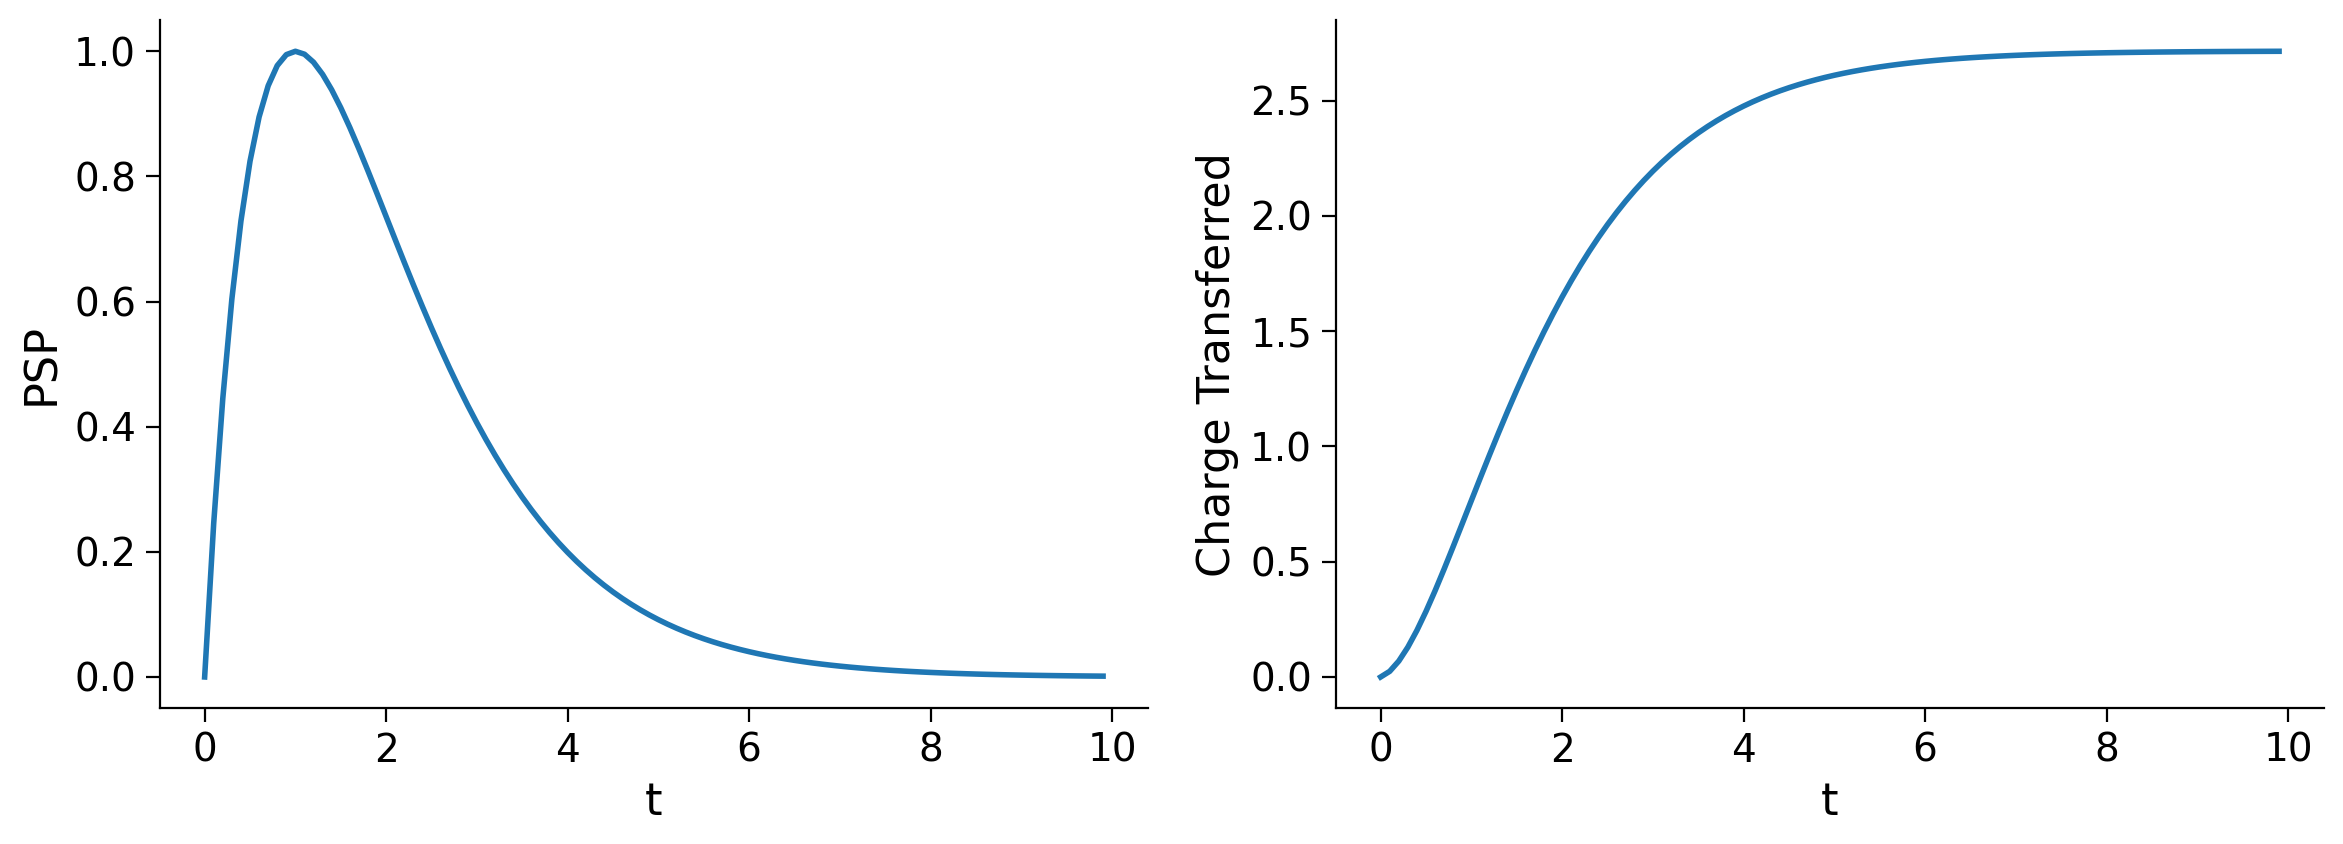

In [45]:
# Set up paramenters
J = 1
tau_s = 1
t_sp = 1
dt = .1
t = np.arange(0,10,dt)

# Compute PSP Formula
PSP = J * t * np.exp(-((t - t_sp)/(t_sp)))

# Compute numerical integral
# We already have PSP at every time step (height of rectangles). We need to multiple by width of rectangles (dt) to  get areas
rectangle_areas = PSP * dt



# Cumilatively sum rectangles (hint np.cumsum)
numerical_integral = np.cumsum(rectangle_areas)

print(PSP[10],"--------", numerical_integral[10])

# Visualize 
plot_charge_transfer(t, PSP, numerical_integral)